In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=2000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=2000)
lat_lngs = zip(lats, lngs)
coordinates= lat_lngs
coordinates

In [3]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [4]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [5]:
#Create an empty list to hold the weather data.
city_data = []
#Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")
#Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="+ weather_api_key



In [10]:
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)


In [11]:
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [12]:
# Add the latitudes and longitudes to a list.
coordinates = list(coordinates)

In [13]:

# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

773

In [ ]:
#Create an empty list to hold the weather data.
city_data = []
#Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")
#Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):
# Group cities in sets of 50 for logging purposes.  
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        #time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_description = city_weather["weather"][0]["description"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Current Description":city_description,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass


# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rungata
City not found. Skipping...
Processing Record 3 of Set 1 | severnoye
Processing Record 5 of Set 1 | conakry
Processing Record 7 of Set 1 | yellowknife
Processing Record 9 of Set 1 | ushuaia
Processing Record 11 of Set 1 | bethel
Processing Record 13 of Set 1 | valle del guamuez
Processing Record 15 of Set 1 | makat
Processing Record 17 of Set 1 | havre-saint-pierre
Processing Record 19 of Set 1 | butaritari
Processing Record 21 of Set 1 | jamestown
Processing Record 23 of Set 1 | cabo san lucas
Processing Record 25 of Set 1 | kodiak
Processing Record 27 of Set 1 | cocoa
Processing Record 29 of Set 1 | rikitea
Processing Record 31 of Set 1 | hithadhoo
Processing Record 33 of Set 1 | clyde river


In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Current Description,Date
0,Port Alfred,-33.5906,26.8910,56.17,95,88,9.71,ZA,overcast clouds,2022-04-09 00:46:49
1,Klyuchi,52.2667,79.1667,33.96,70,0,6.62,RU,clear sky,2022-04-09 00:46:50
2,Hobart,-42.8794,147.3294,69.22,61,75,12.66,AU,broken clouds,2022-04-09 00:46:51
3,Cherskiy,68.7500,161.3000,-6.57,84,32,5.35,RU,scattered clouds,2022-04-09 00:46:52
4,Vaini,-21.2000,-175.2000,87.96,70,40,4.61,TO,scattered clouds,2022-04-09 00:46:53
5,Hithadhoo,-0.6000,73.0833,83.12,68,97,9.35,MV,overcast clouds,2022-04-09 00:46:54
6,Cayenne,4.9333,-52.3333,81.09,1,20,7.00,GF,few clouds,2022-04-09 00:46:55
7,Bethel,41.3712,-73.4140,53.69,58,40,3.44,US,scattered clouds,2022-04-09 00:44:39
8,Ranong,9.9658,98.6348,73.33,81,11,2.37,TH,few clouds,2022-04-09 00:46:55
9,Zatoka,46.0725,30.4654,50.00,75,22,9.66,UA,few clouds,2022-04-09 00:46:56


In [14]:
new_column_order = ["City", "Country", "Date", "Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed","Current Description"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Current Description
0,Port Alfred,ZA,2022-04-09 00:46:49,-33.5906,26.8910,56.17,95,88,9.71,overcast clouds
1,Klyuchi,RU,2022-04-09 00:46:50,52.2667,79.1667,33.96,70,0,6.62,clear sky
2,Hobart,AU,2022-04-09 00:46:51,-42.8794,147.3294,69.22,61,75,12.66,broken clouds
3,Cherskiy,RU,2022-04-09 00:46:52,68.7500,161.3000,-6.57,84,32,5.35,scattered clouds
4,Vaini,TO,2022-04-09 00:46:53,-21.2000,-175.2000,87.96,70,40,4.61,scattered clouds
5,Hithadhoo,MV,2022-04-09 00:46:54,-0.6000,73.0833,83.12,68,97,9.35,overcast clouds
6,Cayenne,GF,2022-04-09 00:46:55,4.9333,-52.3333,81.09,1,20,7.00,few clouds
7,Bethel,US,2022-04-09 00:44:39,41.3712,-73.4140,53.69,58,40,3.44,scattered clouds
8,Ranong,TH,2022-04-09 00:46:55,9.9658,98.6348,73.33,81,11,2.37,few clouds
9,Zatoka,UA,2022-04-09 00:46:56,46.0725,30.4654,50.00,75,22,9.66,few clouds


In [52]:
# Create the output file (CSV).
output_data_file = "Weather_Database/WeatherPy_Database.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [53]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

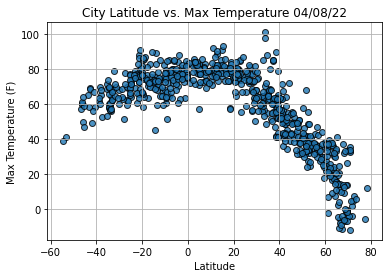

In [54]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

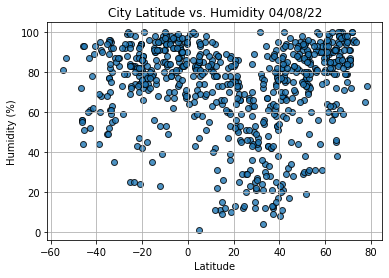

In [55]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

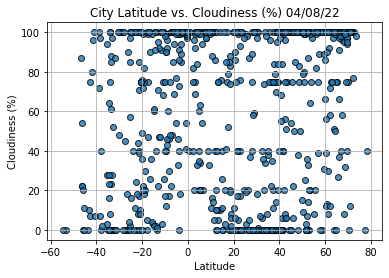

In [56]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

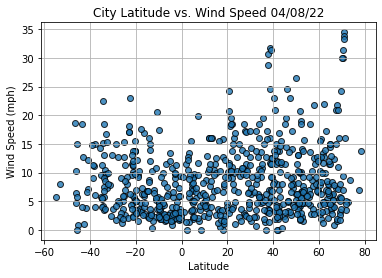

In [57]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [58]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [59]:
index13 = city_data_df.loc[13]
index13

City                            Chokurdakh
Country                                 RU
Date                   2022-04-09 00:46:57
Lat                                70.6333
Lng                               147.9167
Max Temp                             -11.7
Humidity                                91
Cloudiness                              12
Wind Speed                            9.37
Current Description             few clouds
Name: 13, dtype: object

In [60]:
city_data_df["Lat"]>=0


0      False
1       True
2      False
3       True
4      False
       ...  
694     True
695    False
696     True
697     True
698    False
Name: Lat, Length: 699, dtype: bool

In [61]:
city_data_df.loc[(city_data_df["Lat"]>=0)]
city_data_df.loc[(city_data_df["Lat"]>=0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Current Description
1,Klyuchi,RU,2022-04-09 00:46:50,52.2667,79.1667,33.96,70,0,6.62,clear sky
3,Cherskiy,RU,2022-04-09 00:46:52,68.7500,161.3000,-6.57,84,32,5.35,scattered clouds
6,Cayenne,GF,2022-04-09 00:46:55,4.9333,-52.3333,81.09,1,20,7.00,few clouds
7,Bethel,US,2022-04-09 00:44:39,41.3712,-73.4140,53.69,58,40,3.44,scattered clouds
8,Ranong,TH,2022-04-09 00:46:55,9.9658,98.6348,73.33,81,11,2.37,few clouds


In [62]:
index13= city_data_df.loc[13]
index13

City                            Chokurdakh
Country                                 RU
Date                   2022-04-09 00:46:57
Lat                                70.6333
Lng                               147.9167
Max Temp                             -11.7
Humidity                                91
Cloudiness                              12
Wind Speed                            9.37
Current Description             few clouds
Name: 13, dtype: object

In [63]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
     # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [64]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

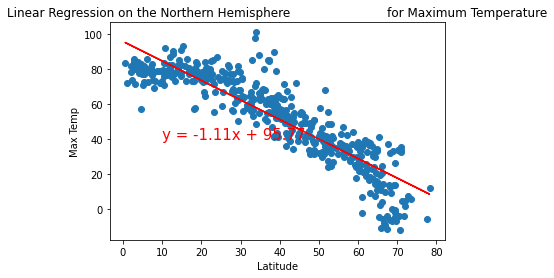

In [65]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

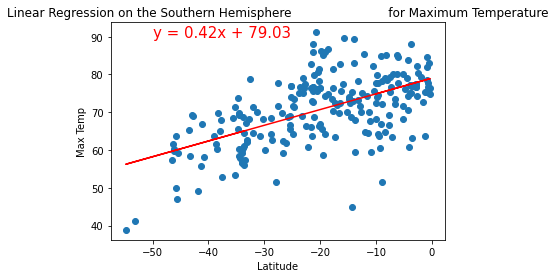

In [66]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

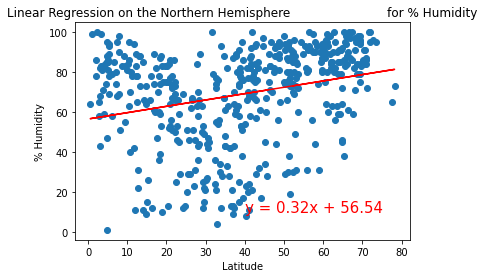

In [67]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

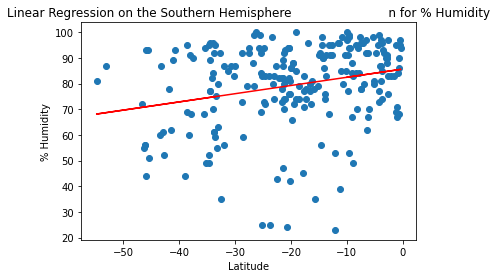

In [68]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        n for % Humidity', '% Humidity',(-50,15))

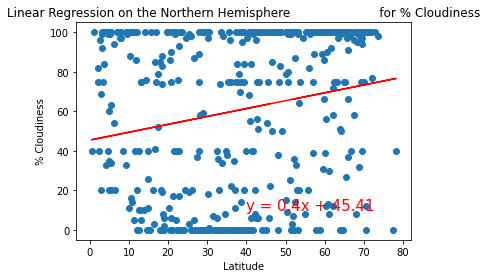

In [35]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\
                       for % Cloudiness', '% Cloudiness',(40,10))

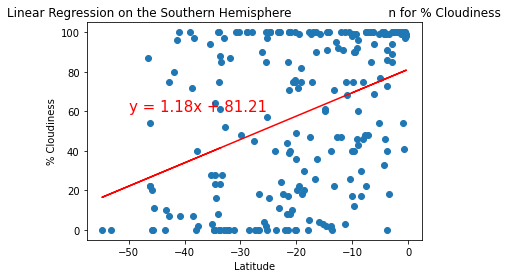

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        n for % Cloudiness', '% Cloudiness',(-50,60))

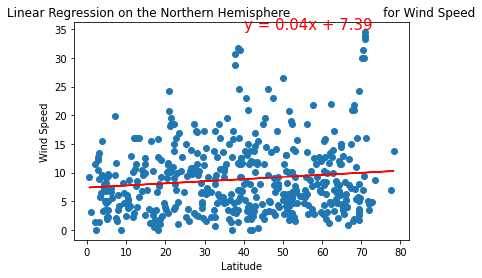

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                       for Wind Speed', 'Wind Speed',(40,35))

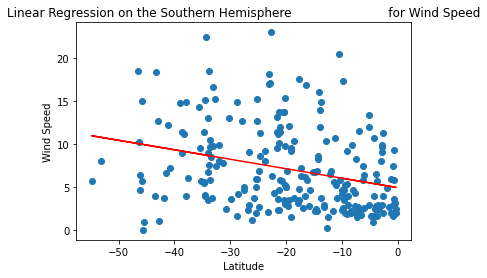

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))